In [ ]:
## je travaille sur colab avec les fichiers sur mon drive
colab = True

In [ ]:
## détermination du path
mypath = ''
if colab:
  from sys import path
  from google.colab import drive
  drive.mount('/content/drive')
  path.insert(0,'/content/drive/MyDrive/portfolio/Walmart sales/')
    mypath = path[0]
mypath

''

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, RobustScaler,MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore", category=Warning)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.set_option('display.max_rows', None)

Récupération du dataset dans un dataframe nommé dataset

In [ ]:
dataset = pd.read_csv(f"{mypath}src/Walmart_Store_sales.csv")

exploration du dataset, CPI signifie Consumer Price Index

In [ ]:
display(dataset.head())
print()
display(dataset.describe(include="all"))
print()
print(dataset.info())
print()
print("valeurs nulles pour chaque variable")
print(dataset.isnull().sum())
print()
print(f'total de valeurs absentes {dataset.isnull().sum().sum()}')
print()
print("pourcentage de valeurs nulles pour chaque variable")
print(100*dataset.isnull().sum()/dataset.shape[0])
print()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
None

valeurs nulles pour chaque variable
Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

total de valeurs absentes 103

pourcentage de valeurs nulles pour chaque variable
Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.

ON SUPPRIME LES LIGNES DES VENTES MANQUANTES DE LA VARIABLE TARGET

In [ ]:
target_var = 'Weekly_Sales'
dataset=dataset[~dataset[target_var].isnull()]
print(dataset.info())
dataset.describe()
display(dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  125 non-null    float64
 4   Temperature   121 non-null    float64
 5   Fuel_Price    124 non-null    float64
 6   CPI           125 non-null    float64
 7   Unemployment  122 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB
None


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833
10,8.0,19-08-2011,895066.50,0.0,82.92,3.554,219.070197,6.425


On supprime les OUTLIERS : [𝑋¯−3𝜎,𝑋¯+3𝜎] sur les colonnes : Temperature, Fuel_price, CPI et Unemployment

In [ ]:
mask_T = ((dataset['Temperature'].mean()-3*dataset['Temperature'].std())< dataset['Temperature']) & (dataset['Temperature']<
           (dataset['Temperature'].mean()+3*dataset['Temperature'].std()))

In [ ]:
mask_F=((dataset['Fuel_Price'].mean()-3*dataset['Fuel_Price'].std())< dataset['Fuel_Price']) & (dataset['Fuel_Price'] <
            (dataset['Fuel_Price'].mean()+3*dataset['Fuel_Price'].std()))

In [ ]:
mask_C=((dataset['CPI'].mean()-3*dataset['CPI'].std())< dataset['CPI']) &(dataset['CPI']  < (dataset['CPI'].mean()+3*dataset['CPI'].std()))

In [ ]:
mask_U = ((dataset['Unemployment'].mean()-3*dataset['Unemployment'].std())< dataset['Unemployment'])&(dataset['Unemployment'] < \
        (dataset['Unemployment'].mean()+3*dataset['Unemployment'].std()))

In [ ]:
mask = mask_T & mask_F & mask_C & mask_U

In [ ]:
dataset = dataset.loc[mask,:]
print(dataset.info())
dataset.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     float64
 1   Date          80 non-null     object 
 2   Weekly_Sales  90 non-null     float64
 3   Holiday_Flag  80 non-null     float64
 4   Temperature   90 non-null     float64
 5   Fuel_Price    90 non-null     float64
 6   CPI           90 non-null     float64
 7   Unemployment  90 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.3+ KB
None


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,90.000000,80,9.000000e+01,80.000000,90.00000,90.000000,90.000000,90.000000
unique,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,25-03-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.900000,NaN,1.233865e+06,0.075000,61.06100,3.318444,179.524905,7.389733
std,6.204475,NaN,6.647250e+05,0.265053,17.74604,0.484399,39.554303,0.982729
min,1.000000,NaN,2.689290e+05,0.000000,18.79000,2.548000,126.128355,5.143000
25%,4.000000,NaN,5.617240e+05,0.000000,45.34250,2.814750,132.602339,6.642250
50%,9.000000,NaN,1.260826e+06,0.000000,61.45000,3.468000,197.166416,7.419000
75%,15.750000,NaN,1.807159e+06,0.000000,75.79250,3.737750,214.855374,8.099000


COMBIEN DE MODALITES DANS LES COLONNES CATEGORIELLES 'Store' et 'Holiday_Flag'

In [ ]:
print(f"modalités dans la colonne'Store': {dataset['Store'].nunique()}")
print(f"modalités dans la colonne'Holiday_Flag': {dataset['Holiday_Flag'].nunique()}")

modalités dans la colonne'Store': 19
modalités dans la colonne'Holiday_Flag': 2


COMPTAGE DES 2 MODALITES DANS 'Holiday_Flag', A COMPARER AVEC LES 11 VALEURS NULLES DANS LA COLONNE, LA STATEGIE D'IMPUTATION 'most frequent' RISQUE D'INTRODUIRE UN BIAIS.

In [ ]:
print(f"nombre de {dataset['Holiday_Flag'].value_counts().index[0]}: {dataset['Holiday_Flag'].value_counts()[0]}")
print(f"nombre de {dataset['Holiday_Flag'].value_counts().index[1]}: {dataset['Holiday_Flag'].value_counts()[1]}")
print(f"nombre de valeurs nulles:{dataset['Holiday_Flag'].isnull().value_counts()[1]}")

nombre de 0.0: 74
nombre de 1.0: 6
nombre de valeurs nulles:10


#### ON ARRONDIT LES VALEURS DU CPI ET ON MET LE TYPE DE LA DATE A 'INT 64' ET ON CREE LES COLONNES DES DATES puis on SUPPRIME LA COLONNE 'Date'

In [ ]:
dataset['CPI']=dataset['CPI'].round(2)
dataset['Fuel_Price'] = dataset['Fuel_Price'].round(2)
dataset['Date']=dataset['Date'].astype('int64',errors='ignore')

In [ ]:
dataset['Year'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True).dt.month
dataset['Day'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True).dt.day
dataset['DayOfWeek'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True).dt.day_of_week
dataset=dataset.drop('Date',axis=1).reset_index(drop=True)

On cherche à classer les types de variables

In [ ]:
categorical_features=[col for col in dataset.select_dtypes(include='object') if col != target_var]
numeric_features=[col for col in dataset.select_dtypes(exclude='object') if col != target_var]
print(categorical_features)
print(numeric_features)

[]
['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']


A première vue, elles sont toutes numériques. Mais attention, il y en a qui sont des catégorielles. Pour les trouver simplement, il suffit de se demander qu'une addition aurait un sens pour ces variables.
On corrige alors.

In [ ]:
## les features par types
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Holiday_Flag','Store','Year', 'Month', 'Day', 'DayOfWeek']

DETERMINATION DES CORRELATIONS ENTRE LA TARGET ET LES FEATURES

On va lancer une première correlation entre toutes les variables. L'opération est techniquement possible car toutes les variables sont de type float alors même qu'il y a des catégorielles. Mais cela nous offrira une comparaison avec la 2ème correlation qui se fera après encodage des catégorielles avec get_dummies. On le verra les résultats des prédictions seront différents entre les 2.

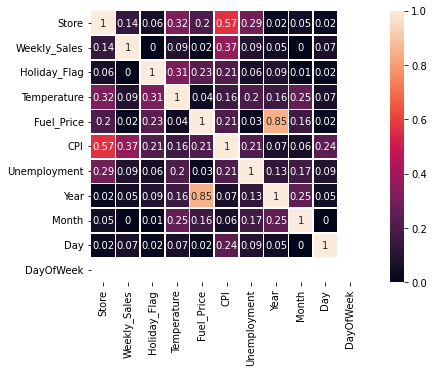

In [ ]:
corr_matrix_plt = abs(dataset.corr().round(2))
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_plt.values,annot=True,  linewidths=.5, vmax=1, square=True,xticklabels=corr_matrix_plt.columns.tolist(), yticklabels=corr_matrix_plt.index.tolist())
plt.show()

ON VOIT DES CORRELATIONS TRES FAIBLES ENTRE VARIABLES, SAUF ENTRE LE FUEL ET L'ANNEE (0.85), entre le CPI et le STORE (0.58).

CE QUI NOUS INTERESSE LE PLUS CE SONT LES CORRELATIONS ENTRE LA TARGET ET LES AUTRES VARIABLES.
WEEKLY_SALES A LA PLUS FORTE CORRELATION AVEC CPI (0.37), STORE (0.14), UNENPLOYMENT ET TEMPERATURE (0.08)

In [ ]:
## on replace les valeurs nulles par 0, puis on trie par ordre descendant sur la target
corr_matrix = abs(dataset.corr())
corr_matrix.fillna(0,inplace=True)
corr_matrix.sort_values(by=target_var,ascending=True,inplace=True)
corr_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
DayOfWeek,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Holiday_Flag,0.058872,0.002396,1.000000,0.307177,0.228853,0.206209,0.061411,0.094575,0.008762,0.018195,0.0
Month,0.054211,0.003495,0.008762,0.254043,0.164852,0.059197,0.170220,0.251491,1.000000,0.000797,0.0
Fuel_Price,0.195815,0.017355,0.228853,0.035815,1.000000,0.206700,0.026737,0.851014,0.164852,0.015478,0.0
Year,0.015391,0.049778,0.094575,0.162938,0.851014,0.073742,0.133026,1.000000,0.251491,0.048291,0.0
Day,0.017591,0.068529,0.018195,0.070313,0.015478,0.235407,0.091931,0.048291,0.000797,1.000000,0.0
Temperature,0.322778,0.091299,0.307177,1.000000,0.035815,0.155229,0.201256,0.162938,0.254043,0.070313,0.0
Unemployment,0.285240,0.094047,0.061411,0.201256,0.026737,0.205194,1.000000,0.133026,0.170220,0.091931,0.0
Store,1.000000,0.140426,0.058872,0.322778,0.195815,0.568767,0.285240,0.015391,0.054211,0.017591,0.0
CPI,0.568767,0.373906,0.206209,0.155229,0.206700,1.000000,0.205194,0.073742,0.059197,0.235407,0.0


Mais pour mieux prendre en compte les variables catégorielles, les encoder avec get_dummies sera plus précis.

In [ ]:
df_dummies = dataset
## pour des raisons pratiques nous allons renommer 'day' en 'jour', parce que 'day' et dayof week commencent par les mêmes lettres
## on modifie également la liste des features catégorielles en fonction de ce changement
categorical_corr_feat=[x for x in categorical_features if x !='Day']+['jour']
df_dummies=df_dummies.rename(columns={'Day':'jour'})
df_dummies

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,jour,DayOfWeek
0,6.0,1572117.54,NaN,59.61,3.04,214.78,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.44,128.62,7.470,2011.0,3.0,25.0,4.0
2,6.0,1644470.66,0.0,78.89,2.76,212.41,7.092,2010.0,5.0,28.0,4.0
3,15.0,695396.19,0.0,69.80,4.07,134.86,7.658,2011.0,6.0,3.0,4.0
4,20.0,2203523.20,0.0,39.93,3.62,213.02,6.961,2012.0,2.0,3.0,4.0
5,3.0,418925.47,0.0,60.12,3.56,224.13,6.833,NaN,NaN,NaN,NaN
6,8.0,895066.50,0.0,82.92,3.55,219.07,6.425,2011.0,8.0,19.0,4.0
7,18.0,1029618.10,0.0,52.02,2.88,132.76,9.331,2010.0,10.0,15.0,4.0
8,7.0,414094.05,0.0,36.61,3.77,192.83,8.595,2011.0,5.0,13.0,4.0
9,1.0,1677472.78,0.0,64.74,3.73,221.21,7.348,2012.0,3.0,16.0,4.0


In [ ]:
df_dummies=pd.get_dummies(df_dummies, prefix=categorical_corr_feat, prefix_sep='_', dummy_na=False, columns=categorical_corr_feat, sparse=False, drop_first=True, dtype=None)

In [ ]:
## encodage
display(df_dummies.head())
df_dummies.info()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1.0,Store_2.0,Store_3.0,Store_4.0,Store_5.0,...,jour_22.0,jour_23.0,jour_24.0,jour_25.0,jour_26.0,jour_27.0,jour_28.0,jour_29.0,jour_30.0,jour_31.0
0,1572117.54,59.61,3.04,214.78,6.858,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1807545.43,42.38,3.44,128.62,7.470,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1644470.66,78.89,2.76,212.41,7.092,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,695396.19,69.80,4.07,134.86,7.658,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2203523.20,39.93,3.62,213.02,6.961,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weekly_Sales      90 non-null     float64
 1   Temperature       90 non-null     float64
 2   Fuel_Price        90 non-null     float64
 3   CPI               90 non-null     float64
 4   Unemployment      90 non-null     float64
 5   Holiday_Flag_1.0  90 non-null     uint8  
 6   Store_2.0         90 non-null     uint8  
 7   Store_3.0         90 non-null     uint8  
 8   Store_4.0         90 non-null     uint8  
 9   Store_5.0         90 non-null     uint8  
 10  Store_6.0         90 non-null     uint8  
 11  Store_7.0         90 non-null     uint8  
 12  Store_8.0         90 non-null     uint8  
 13  Store_9.0         90 non-null     uint8  
 14  Store_10.0        90 non-null     uint8  
 15  Store_11.0        90 non-null     uint8  
 16  Store_13.0        90 non-null     uint8  
 17 

In [ ]:
## Correlation matrix
corr_matrix_dummies = abs(df_dummies.corr(method='spearman')).sort_values(by=target_var ,ascending=True)
corr_matrix_dummies.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1.0,Store_2.0,Store_3.0,Store_4.0,Store_5.0,...,jour_22.0,jour_23.0,jour_24.0,jour_25.0,jour_26.0,jour_27.0,jour_28.0,jour_29.0,jour_30.0,jour_31.0
jour_7.0,0.002901,0.089946,0.005804,0.031916,0.092851,0.261892,0.333256,0.050252,0.036564,0.036564,...,0.027995,0.022727,0.022727,0.036564,0.027995,0.027995,0.015980,0.015980,0.032513,0.015980
Holiday_Flag_1.0,0.005144,0.270905,0.216064,0.104591,0.061728,1.000000,0.057639,0.089087,0.064820,0.064820,...,0.049629,0.040291,0.040291,0.064820,0.198517,0.049629,0.028330,0.028330,0.057639,0.396615
Month_8.0,0.007186,0.270680,0.111000,0.063079,0.048709,0.077615,0.062631,0.096803,0.070435,0.070435,...,0.053928,0.043781,0.043781,0.070435,0.177191,0.408309,0.030783,0.030783,0.062631,0.030783
jour_26.0,0.010722,0.075053,0.102465,0.001191,0.165600,0.198517,0.040048,0.061898,0.045038,0.045038,...,0.034483,0.027995,0.027995,0.045038,1.000000,0.034483,0.019684,0.019684,0.040048,0.019684
Fuel_Price,0.013419,0.080373,1.000000,0.107064,0.059803,0.216064,0.021794,0.122620,0.009337,0.039215,...,0.103656,0.044978,0.039175,0.085899,0.102465,0.095316,0.120380,0.073452,0.116235,0.030605


In [ ]:
## correlation triée par ordre croissant selon la target
corr_matrix_dummies_target = corr_matrix_dummies.iloc[:-1][target_var]
corr_matrix_dummies_target

jour_7.0            0.002901
Holiday_Flag_1.0    0.005144
Month_8.0           0.007186
jour_26.0           0.010722
Fuel_Price          0.013419
Month_6.0           0.014969
jour_14.0           0.022441
Store_19.0          0.027433
Year_2011.0         0.033898
jour_27.0           0.036931
jour_22.0           0.039313
jour_23.0           0.040621
jour_5.0            0.049325
Month_7.0           0.050272
Store_18.0          0.051900
jour_6.0            0.055128
Year_2012.0         0.058343
jour_28.0           0.059163
jour_17.0           0.063832
jour_15.0           0.063832
jour_18.0           0.072013
jour_3.0            0.072537
Store_11.0          0.078340
jour_31.0           0.083644
jour_12.0           0.084015
Month_11.0          0.085729
Store_8.0           0.087166
Store_17.0          0.089348
Month_4.0           0.090227
Store_6.0           0.091316
Month_9.0           0.095467
Month_2.0           0.100693
jour_4.0            0.101552
jour_25.0           0.105494
jour_2.0      

In [ ]:
dataset.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [ ]:
## fonction pour additionner les valeurs de correlation des colonnes de même classe
def func_rating_vars_prefix(list_col1,liste_col2):
  corr_note={}
  for x in liste_col2:
    corr_note[x]=0
  for x in list_col1:
    for y in liste_col2:
      if x.startswith(y):
        corr_note[y]=corr_note[y]+corr_matrix_dummies_target.loc[x]
  return corr_note

corr_note=func_rating_vars_prefix(corr_matrix_dummies_target.index.tolist(),categorical_corr_feat+numeric_features)
print(corr_matrix[target_var])
print()
corr_note

DayOfWeek       0.000000
Holiday_Flag    0.002396
Month           0.003495
Fuel_Price      0.017355
Year            0.049778
Day             0.068529
Temperature     0.091299
Unemployment    0.094047
Store           0.140426
CPI             0.373906
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64



{'Holiday_Flag': 0.005143762524742116,
 'Store': 3.6794267512532146,
 'Year': 0.09224144015640579,
 'Month': 1.278034427362365,
 'DayOfWeek': 0,
 'jour': 2.9097894203880785,
 'Temperature': 0.11687862699098654,
 'Fuel_Price': 0.01341889604153438,
 'CPI': 0.48423660730625434,
 'Unemployment': 0.13211282575618866}

C'est juste pour avoir une idée de ce que cela peut donner: éclater les données puis les reconstituer pour voir. Ainsi store, Day (jour),Month et CPI viennent en tête.

On va lancer quelques viz en fonction de la target et des features les plus importantes, et aussi entre quelques features fortement correlées et aussi le fuel price par pure curiosité

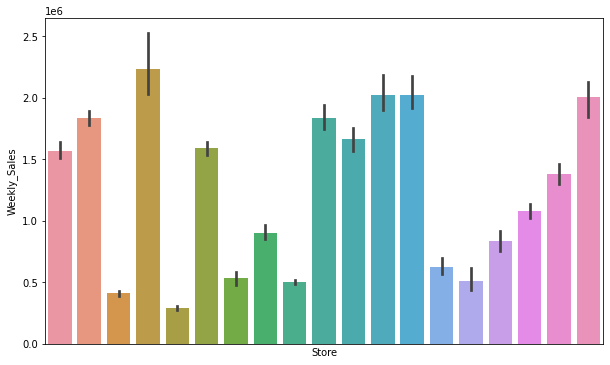

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['Store'],y=dataset['Weekly_Sales'])
plt.xticks([])
plt.show()

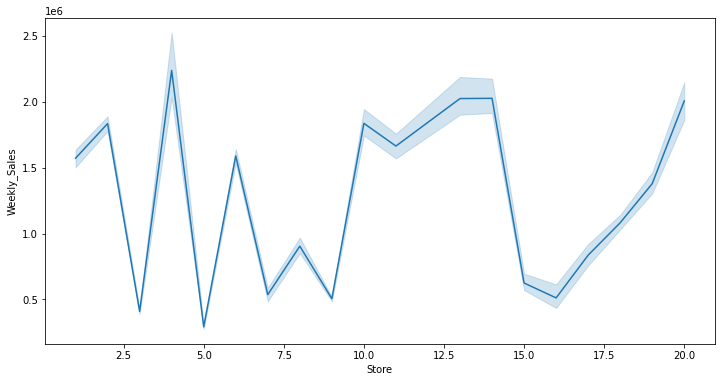

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dataset,x='Store',y='Weekly_Sales')
plt.show()

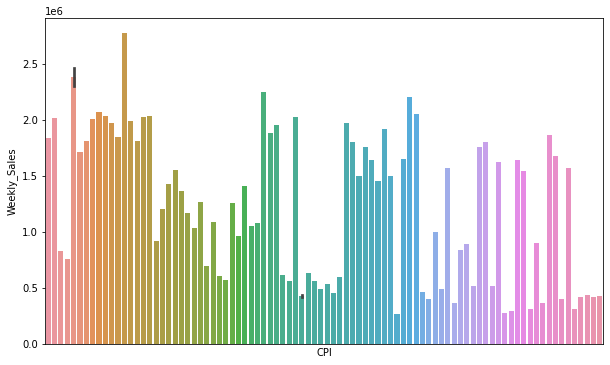

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['CPI'],y=dataset['Weekly_Sales'])
plt.xticks([])
plt.show()

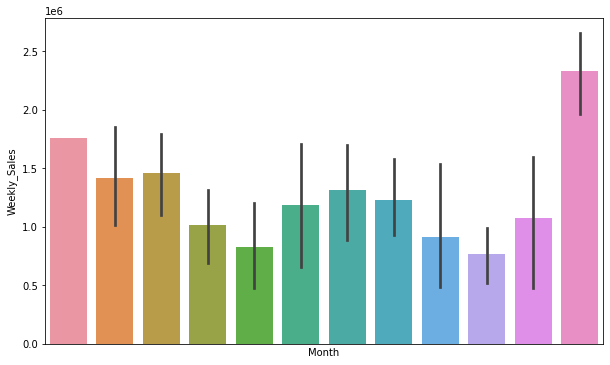

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['Month'],y=dataset['Weekly_Sales'])
plt.xticks([])
plt.show()

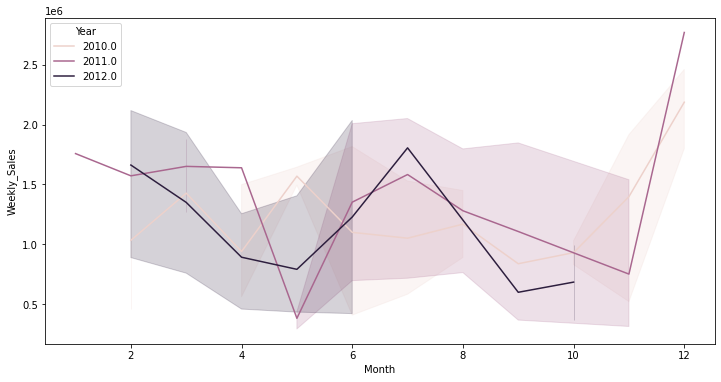

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dataset,x='Month',y='Weekly_Sales',hue='Year')
plt.show()

<Figure size 864x432 with 0 Axes>

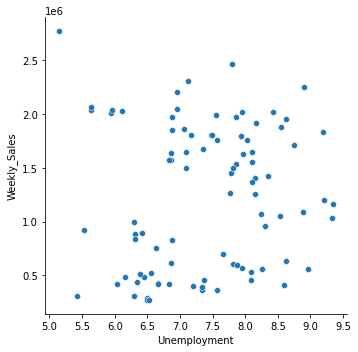

In [ ]:
plt.figure(figsize=(12,6))
sns.relplot(y=dataset['Weekly_Sales'],x=dataset['Unemployment'])
plt.locator_params(axis='both', nbins=10)
plt.show()

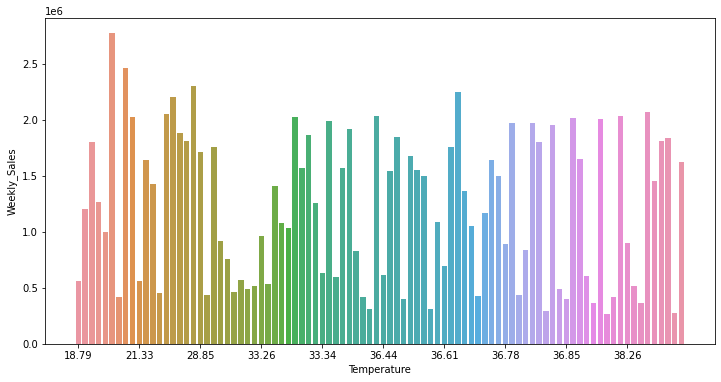

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=dataset['Weekly_Sales'],x=dataset['Temperature'],order=dataset['Temperature'].sort_values())
plt.locator_params(axis='both', nbins=10)
plt.show()

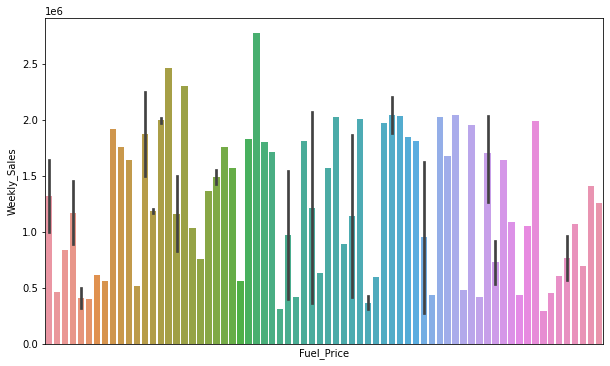

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['Fuel_Price'],y=dataset['Weekly_Sales'])
plt.xticks([])
plt.show()

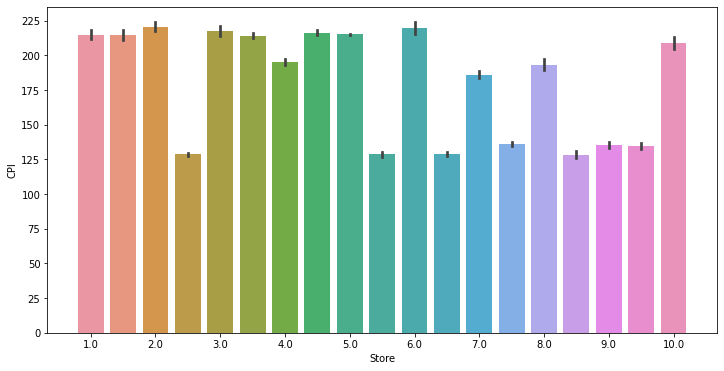

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=dataset['CPI'],x=dataset['Store'])
plt.locator_params(axis='both', nbins=10)
plt.show()

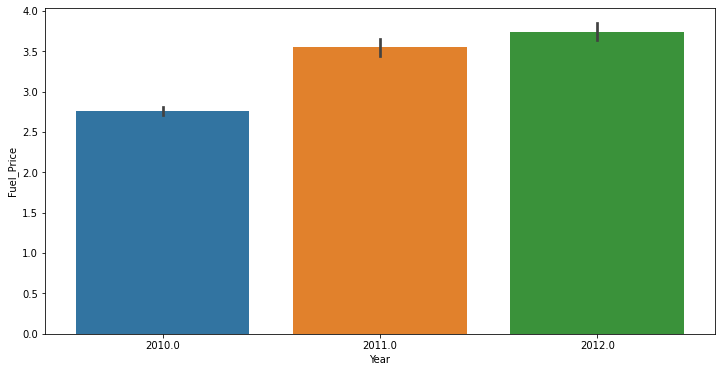

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=dataset['Fuel_Price'],x=dataset['Year'])
plt.locator_params(axis='both', nbins=10)
plt.show()

In [ ]:
## création des dataframe features et target
X = dataset
Y = X.loc[:,[target_var]]
X = X.drop(target_var,axis=1)
display(X.head())
print(X.info())
display(Y.head())
print(Y.info())

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
0,6.0,NaN,59.61,3.04,214.78,6.858,2011.0,2.0,18.0,4.0
1,13.0,0.0,42.38,3.44,128.62,7.470,2011.0,3.0,25.0,4.0
2,6.0,0.0,78.89,2.76,212.41,7.092,2010.0,5.0,28.0,4.0
3,15.0,0.0,69.80,4.07,134.86,7.658,2011.0,6.0,3.0,4.0
4,20.0,0.0,39.93,3.62,213.02,6.961,2012.0,2.0,3.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     float64
 1   Holiday_Flag  80 non-null     float64
 2   Temperature   90 non-null     float64
 3   Fuel_Price    90 non-null     float64
 4   CPI           90 non-null     float64
 5   Unemployment  90 non-null     float64
 6   Year          80 non-null     float64
 7   Month         80 non-null     float64
 8   Day           80 non-null     float64
 9   DayOfWeek     80 non-null     float64
dtypes: float64(10)
memory usage: 7.2 KB
None


,Weekly_Sales
0,1572117.54
1,1807545.43
2,1644470.66
3,695396.19
4,2203523.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  90 non-null     float64
dtypes: float64(1)
memory usage: 848.0 bytes
None


PREDICTION: étant donné le peu de données dans notre dataset, nous utiliserons toujours score_val_score(avec un cv <11) pour évaluer les performances du modèle utilisé

In [ ]:
## on redéfinit les variables, un changement a pu avoir lieu
categorical_features=[col for col in categorical_features if col in dataset.columns]
numeric_features=[col for col in numeric_features if col  in dataset.columns]

## train set, test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=0)

num_pipe = Pipeline(steps=[('numImputer',KNNImputer(n_neighbors=10)),
                               ('numScaler',StandardScaler())], verbose=True)

cat_pipe = Pipeline(steps=[('catImputer',SimpleImputer(strategy='most_frequent')),\
   #('encoder',OneHotEncoder(drop = 'first',sparse=False,handle_unknown='ignore')),('catScaler',MaxAbsScaler())])
  ('encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                transformers=[('num_pipe',num_pipe,numeric_features),\
                                ('cat_pipe_norm',cat_pipe,categorical_features)])
## Preprocessings
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

[Pipeline] ........ (step 1 of 2) Processing numImputer, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing numScaler, total=   0.0s


ON VA ENTRAINER UNE LinearRegression

In [ ]:
lng = LinearRegression()
lng.fit(X_train,Y_train)
##PREDICTIONS
Y_trainPred = lng.predict(X_train)
Y_testPred = lng.predict(X_test)
## LES PERFORMANCES
print("score on training set : ",r2_score(Y_train, Y_trainPred))
print("score on test set : ",r2_score(Y_test, Y_testPred))
print("standard deviation on train set :", cross_val_score(lng, X_train, Y_train, cv=10, scoring='r2').std())
print("mean on train set :", cross_val_score(lng, X_train, Y_train, cv=10, scoring='r2').mean())

score on training set :  0.9978313977629036
score on test set :  0.9584496199216834
standard deviation on train set : 0.05615824273480958
mean on train set : 0.8852599760898638


ON A DE L'OVERFITING. ON VA UTILISER RIDGE ET LASSO POUR ESSAYER DE LE REDUIRE EN JOUANT
SUR L'HYPERPARAMETRE

In [ ]:
## Ridge
ridge = Ridge(0)
ridge.fit(X_train, Y_train)

## Afficher les scores
print("R2 score on training set : ", ridge.score(X_train, Y_train))
print("R2 score on test set : ", ridge.score(X_test, Y_test))
print("standard deviation on train set :", cross_val_score(ridge, X_train, Y_train, cv=10, scoring='r2').std())
print("mean on train set :", cross_val_score(ridge, X_train, Y_train, cv=10, scoring='r2').mean())


R2 score on training set :  0.9978005081410092
R2 score on test set :  0.9547305201416141
standard deviation on train set : 0.04787358800835443
mean on train set : 0.896088203155014


In [ ]:
## gridsearch avec Lasso
model = Lasso()
gds=GridSearchCV(model, param_grid = {'alpha':range(900)}, cv = 10,scoring='r2')
gds.fit(X_train, Y_train)
print("Best hyperparameters : ",gds.best_params_)
print("Best validation score :", gds.best_score_)

Best hyperparameters :  {'alpha': 450}
Best validation score : 0.9599164159933619


In [ ]:
## Lasso
lasso = Lasso(alpha = 450)
lasso.fit(X_train, Y_train)

## Afficher les scores
print("R2 score on training set : ", lasso.score(X_train, Y_train))
print("R2 score on test set : ", lasso.score(X_test, Y_test))
print("standard deviation on train set :", cross_val_score(lasso, X_train, Y_train, cv=10, scoring='r2').std())
print("mean score on train set :", cross_val_score(lasso, X_train, Y_train, cv=10, scoring='r2').mean())

R2 score on training set :  0.9964045692826518
R2 score on test set :  0.9403408112707234
standard deviation on train set : 0.03179347282759165
mean score on train set : 0.9599164159933619


sans surprise greadearch et cross_val_score (2 méthode de validation croisée)  sur Lasso donnent un résultat similaire

ON VA FAIRE TOUTE UNE BATTERIE DE TESTS, EN ELIMINANT DES VARIABLES PROGRESSIVEMENT PUIS AVEC LE MEILLEUR RESULTAT OBTENU, FAIRE JOUER LASSO POUR REDUIRE L'OVERFITING. On commence par une LinearRegression, on retient les variables offrant le meilleur score, puis on utilise Greadserach Lasso pour trouver les meilleurs hyperparamètres pour réduire l'overfiting et on comparera aussi avec une cross_val_score avec Lasso.

On va établir une liste ordonnée des features (de chaque matrice de correlation) en commençant par le plus faible pour faire les tests

In [ ]:
## les features par types
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Year', 'Month', 'Day', 'DayOfWeek','Holiday_Flag','Store']
target_var='Weekly_Sales'
abs(corr_matrix.round(3)).index


Index(['DayOfWeek', 'Holiday_Flag', 'Month', 'Fuel_Price', 'Year', 'Day',
       'Temperature', 'Unemployment', 'Store', 'CPI', 'Weekly_Sales'],
      dtype='object')

In [ ]:
## à partir de la 2ème correlation on prépare la liste à tester
list_corr2 = []
corr_to_drop = sorted(corr_note.values())
for x in corr_to_drop:
  for cle in corr_note.keys():
    if corr_note[cle]==x and cle != target_var:
      if cle == 'jour':
        cle='Day'
      list_corr2.append(cle)
#list_corr2 = np.unique(list_corr2)
list_corr2

['DayOfWeek',
 'Holiday_Flag',
 'Fuel_Price',
 'Year',
 'Temperature',
 'Unemployment',
 'CPI',
 'Month',
 'Day',
 'Store']

In [ ]:
## Fonction pour lancer le model avec le préprocessing
def func_test_ML_model(ML_model,numeric_features,categorical_features):
  ## train set, test set
  X = dataset
  Y = X[target_var]
  X = X[numeric_features+categorical_features]
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=0)

  num_pipe = Pipeline(steps=[('numImputer',KNNImputer(n_neighbors=10)),
                                ('numScaler',StandardScaler())], verbose=False)

  cat_pipe = Pipeline(steps=[('catImputer',SimpleImputer(strategy='most_frequent')),\
    ('encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])

  preprocessor = ColumnTransformer(
                  transformers=[('num_pipe',num_pipe,numeric_features),\
                                  ('cat_pipe_norm',cat_pipe,categorical_features)])
  ## Preprocessings
  X_train = preprocessor.fit_transform(X_train)
  X_test = preprocessor.transform(X_test)
  cv_=10
  ## le model
  model = ML_model
  model.fit(X_train,Y_train)
  ##PREDICTIONS
  Y_trainPred = model.predict(X_train)
  Y_testPred = model.predict(X_test)
  ## LES PERFORMANCES
  Y_trainPred = model.predict(X_train)
  Y_testPred = model.predict(X_test)
  try:
    result_dict ={
          "cat vars":categorical_features,
          "num vars":numeric_features,
          "score training set" : r2_score(Y_train, Y_trainPred),
          "score test set": r2_score(Y_test, Y_testPred),
          "cross_val_score, standard deviation on train set score" : cross_val_score(model, X_train, Y_train, cv=cv_, scoring='r2').std(),
          "cross_val_score, Mean score on train set" : cross_val_score(model, X_train, Y_train, cv=cv_, scoring='r2').mean(),
          "Best hyperparameters" : model.best_params_,
          "Best validation score" : model.best_score_,
    }
  except:
    result_dict ={
        "cat vars":categorical_features,
        "num vars":numeric_features,
        "score training set" : r2_score(Y_train, Y_trainPred),
        "score test set": r2_score(Y_test, Y_testPred),
        "cross_val_score, standard deviation on train set score" : cross_val_score(model, X_train, Y_train, cv=cv_, scoring='r2').std(),
        "cross_val_score, Mean score on train set" : cross_val_score(model, X_train, Y_train, cv=cv_, scoring='r2').mean(),
    }

  return result_dict

In [ ]:
## Fonction qui appelle la fonction 'func_test_ML_model' en lui fournissant les variables à préprocesser,
## en dropant une variable à chaque itération en commençant par les variables de plus faible correlation avec la target
def func_test_corr(ML_model,numeric_features,categorical_features,col_to_drop=None):
    resultat = []
    i=0
    if col_to_drop==None:
      col_to_drop=abs(corr_matrix).drop(index=target_var).index
    while i < (len(col_to_drop)):
        resultat.append(func_test_ML_model(ML_model,numeric_features,categorical_features))
        if (len(numeric_features)+len(categorical_features))==1:
          i = i+1
          break
        else:
          if col_to_drop[i] in numeric_features:
            numeric_features = [x for x in numeric_features if x != col_to_drop[i]]
          elif col_to_drop[i] in categorical_features:
            categorical_features = [x for x in categorical_features if x != col_to_drop[i]]
          i = i+1
    return resultat



In [ ]:
## on teste les résultats de la 1ère correlation
resultat_LR = func_test_corr(LinearRegression(),numeric_features,categorical_features)
resultat_LR

[{'cat vars': ['Year', 'Month', 'Day', 'DayOfWeek', 'Holiday_Flag', 'Store'],
  'num vars': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
  'score training set': 0.9978313977629037,
  'score test set': 0.9584496201404675,
  'cross_val_score, standard deviation on train set score': 0.05615824349614945,
  'cross_val_score, Mean score on train set': 0.8852599757781905},
 {'cat vars': ['Year', 'Month', 'Day', 'Holiday_Flag', 'Store'],
  'num vars': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
  'score training set': 0.9978313977629037,
  'score test set': 0.9584496201404675,
  'cross_val_score, standard deviation on train set score': 0.05615824349614945,
  'cross_val_score, Mean score on train set': 0.8852599757781905},
 {'cat vars': ['Year', 'Month', 'Day', 'Store'],
  'num vars': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
  'score training set': 0.9977634918494208,
  'score test set': 0.945189082703832,
  'cross_val_score, standard deviation on train set score

In [ ]:
## on teste les résultats de la 2ème correlation
resultat_LR2 = func_test_corr(LinearRegression(),numeric_features,categorical_features,list_corr2)
resultat_LR2


[{'cat vars': ['Year', 'Month', 'Day', 'DayOfWeek', 'Holiday_Flag', 'Store'],
  'num vars': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
  'score training set': 0.9978313977629037,
  'score test set': 0.9584496201404675,
  'cross_val_score, standard deviation on train set score': 0.05615824349614945,
  'cross_val_score, Mean score on train set': 0.8852599757781905},
 {'cat vars': ['Year', 'Month', 'Day', 'Holiday_Flag', 'Store'],
  'num vars': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
  'score training set': 0.9978313977629037,
  'score test set': 0.9584496201404675,
  'cross_val_score, standard deviation on train set score': 0.05615824349614945,
  'cross_val_score, Mean score on train set': 0.8852599757781905},
 {'cat vars': ['Year', 'Month', 'Day', 'Store'],
  'num vars': ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
  'score training set': 0.9977634918494208,
  'score test set': 0.945189082703832,
  'cross_val_score, standard deviation on train set score

In [ ]:
df_resultat_LR =pd.DataFrame(resultat_LR)
df_resultat_LR =df_resultat_LR.sort_values('score test set',ascending=False)
df_resultat_LR

,cat vars,num vars,score training set,score test set,"cross_val_score, standard deviation on train set score","cross_val_score, Mean score on train set"
0,"[Year, Month, Day, DayOfWeek, Holiday_Flag, St...","[Temperature, Fuel_Price, CPI, Unemployment]",0.997831,0.958450,0.056158,0.885260
1,"[Year, Month, Day, Holiday_Flag, Store]","[Temperature, Fuel_Price, CPI, Unemployment]",0.997831,0.958450,0.056158,0.885260
2,"[Year, Month, Day, Store]","[Temperature, Fuel_Price, CPI, Unemployment]",0.997763,0.945189,0.065626,0.898437
8,[Store],[CPI],0.977756,0.903104,0.020686,0.955632
6,[Store],"[Temperature, CPI, Unemployment]",0.978660,0.895310,0.018137,0.954865
7,[Store],"[CPI, Unemployment]",0.978482,0.889691,0.018176,0.955677
5,"[Day, Store]","[Temperature, CPI, Unemployment]",0.993233,0.863720,0.021432,0.959377
3,"[Year, Day, Store]","[Temperature, Fuel_Price, CPI, Unemployment]",0.994147,0.852057,0.038703,0.951773
4,"[Year, Day, Store]","[Temperature, CPI, Unemployment]",0.994134,0.849836,0.040544,0.950130
9,[],[CPI],0.112036,0.257599,0.142948,-0.048712


In [ ]:
df_resultat_LR2 =pd.DataFrame(resultat_LR2)
df_resultat_LR2 =df_resultat_LR2.sort_values('score test set',ascending=False)
df_resultat_LR2

,cat vars,num vars,score training set,score test set,"cross_val_score, standard deviation on train set score","cross_val_score, Mean score on train set"
7,"[Month, Day, Store]",[],0.997015,0.963762,0.054475,0.934091
6,"[Month, Day, Store]",[CPI],0.997054,0.961364,0.059379,0.923408
4,"[Month, Day, Store]","[Temperature, CPI, Unemployment]",0.997062,0.958627,0.057850,0.919018
5,"[Month, Day, Store]","[CPI, Unemployment]",0.997061,0.958554,0.058608,0.922170
0,"[Year, Month, Day, DayOfWeek, Holiday_Flag, St...","[Temperature, Fuel_Price, CPI, Unemployment]",0.997831,0.958450,0.056158,0.885260
1,"[Year, Month, Day, Holiday_Flag, Store]","[Temperature, Fuel_Price, CPI, Unemployment]",0.997831,0.958450,0.056158,0.885260
2,"[Year, Month, Day, Store]","[Temperature, Fuel_Price, CPI, Unemployment]",0.997763,0.945189,0.065626,0.898437
3,"[Year, Month, Day, Store]","[Temperature, CPI, Unemployment]",0.997604,0.945089,0.061276,0.912285
9,[Store],[],0.977743,0.903305,0.020168,0.956700
8,"[Day, Store]",[],0.992829,0.888206,0.015707,0.967990


En me basant sur ces resultats par rapport au train set
  

*   les résultats sont meilleurs dans le cas de la 2ème matrice de correlation, y compris si on compare le cross_val_score. Tant en terme de score sur le train set que la moyenne du cross_val_score, les meilleurs résultats sont obtenus avec les features ayant la plus forte correlation dans le 2ème cas.

*   Alors que ce n'est pas du tout le cas dans la première matrice de correlation: la meilleure moyenne est obtenue avec les features de meilleures correlation, alors que le meilleur score sur test set est obtenu avec l'ensemble des variables.

*   L'overfiting est moindre dans le cas de la 2ème matrice.

Il serait trop couteux en terme de temps de faire de la combinatoire sur ces features pour trouver la meilleure combinaison. Mais il est toujours possible de faire le test en sens inverse, en éliminant les feautures de meilleure correlation pour voir comment les résultats varient.






In [ ]:
## on lance un gridsearch sur le meilleure résultat pour grapiller ce qu'on peut
func_test_ML_model(GridSearchCV(Lasso(), param_grid = {'alpha':range(900)}, cv = 10,scoring='r2'),[],['Month','Day','Store'])

{'cat vars': ['Month', 'Day', 'Store'],
 'num vars': [],
 'score training set': 0.9949957472301255,
 'score test set': 0.9539340304943875,
 'cross_val_score, standard deviation on train set score': 0.04836326884948702,
 'cross_val_score, Mean score on train set': 0.953982881808224,
 'Best hyperparameters': {'alpha': 572},
 'Best validation score': 0.9578577327525309}

In [ ]:
## on peut vérifier le best alpha donné par greasearch
func_test_ML_model(Lasso(alpha=572),[],['Month','Day','Store'])

{'cat vars': ['Month', 'Day', 'Store'],
 'num vars': [],
 'score training set': 0.9949957472301255,
 'score test set': 0.9539340304943875,
 'cross_val_score, standard deviation on train set score': 0.04100979120493631,
 'cross_val_score, Mean score on train set': 0.9578577327525309}

On a grapillé plus de 2 centièmes en terme de moyenne sur le cross_val_score